# TD 3 

In [42]:
sigmoid <- function(x) {
  return (exp(x)/(1+exp(x)))
}

In [43]:
df <- read.table("titanic.csv", sep=";", header=TRUE, dec=",", na.strings = "")
df$pclass <- factor(df$pclass)
df$survived <- factor(df$survived)
df <- df[complete.cases(df),]

In [ ]:
sigmoid()

### Partie 3

##### Q1


(a) L'odd est défini par $\text{odd}(x)=\frac{\mathbb{P}(Y=1|x)}{\mathbb{P}(Y=0|x)}=\frac{\pi(x)}{1-\pi(x)}$

In [3]:
df$survived <- relevel(df$survived, ref="0")
surv.null <- glm(survived ~ 1, family = binomial, data = df)
surv.null


Call:  glm(formula = survived ~ 1, family = binomial, data = df)

Coefficients:
(Intercept)  
     -0.376  

Degrees of Freedom: 1043 Total (i.e. Null);  1043 Residual
Null Deviance:	    1411 
Residual Deviance: 1411 	AIC: 1413

Dans le cas d'une régression logistique avec un seul coefficient on a $\pi(x)=\sigma(\beta_{0})$

In [4]:
sigmoid(-0.376)/(1-sigmoid(-0.376))

[1] 0.6866023

In [5]:
exp(coef(surv.null))

(Intercept) 
  0.6865913

On a 0.68 fois plus de chance de survivre que de mourir au naufrage du titanic.

##### Q2

In [6]:
df$survived <- relevel(df$survived, ref="0")
df$sex<- relevel(df$sex, ref='male')
surv.sex <- glm(survived ~ sex, family = binomial, data = df)
summary(surv.sex)


Call:
glm(formula = survived ~ sex, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6682  -0.6777  -0.6777   0.7562   1.7798  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.35431    0.09654  -14.03   <2e-16 ***
sexfemale    2.45984    0.15226   16.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1411.0  on 1043  degrees of freedom
Residual deviance: 1100.9  on 1042  degrees of freedom
AIC: 1104.9

Number of Fisher Scoring iterations: 4


In [7]:
sigmoid(1.1055)

[1] 0.7512892

In [8]:
sigmoid(-1.35431)

[1] 0.2051666

In [9]:
a=sigmoid(1.1055)/(1-sigmoid(1.1055))
b=sigmoid(-1.35431)/(1-sigmoid(1.35431))

In [10]:
exp(2.45984)

[1] 11.70294

In [11]:
(0.75/0.25)/(0.20/0.80)

[1] 12

(a)

In [12]:
1-pchisq(surv.sex$null.deviance-surv.sex$deviance,surv.sex$df.null-surv.sex$df.residual)

[1] 0

On rejette l'hypothèse nulle : le modèle est statistiquement valable

Pour une variable binaire $OR=\frac{\frac{\pi(1)}{1-\pi(1)}}{\frac{\pi(0)}{1-\pi(0)}}$

$log(OR)=log(\frac{\pi(1)}{1-\pi(1)})-log(\frac{\pi(0)}{1-\pi(0)})=logit(\pi(1))-logit(\pi(0))$

Ici notre modèle s'écrit $\pi(x)=\sigma(\beta_{0}+\beta_{1}\mathbb{I}_{\text{sex=homme}}(x))$

Alors $\pi(1)=\sigma(\beta_{0}+\beta_{1})$ et $\pi(0)=\sigma(\beta_{0})$

Alors $log(OR)=logit(\pi(1))-logit(\pi(0))=\beta_{1}$

D'où $OR=exp(\beta_{1})$

(a) 

In [13]:
a=sigmoid(-1.35431)/(1-sigmoid(-1.35431))
b=sigmoid(-1.35431+2.45984)/(1-sigmoid(-1.35431+2.45984))

In [14]:
b/a

[1] 11.70294

In [15]:
exp(2.45984)

[1] 11.70294

(b)
on a 11,7 fois plus de chances de survivre au naufrage du titanic lorsqu'on est une femme que lorsqu'on n'en est pas une.

#### Q3

(a) $\pi(x)=\sigma(\beta_{0}+\beta_{1}\mathbb{I}_{\text{pclass=2}}(x)+\beta_{2}\mathbb{I}_{\text{pclass=3}}(x))$

In [16]:
df$pclass<- relevel(df$pclass, ref='3')
surv.pclass <- glm(survived ~ pclass, family = binomial, data = df)
summary(surv.pclass)


Call:
glm(formula = survived ~ pclass, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4193  -0.7786  -0.7786   0.9534   1.6379  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0383     0.1017 -10.213  < 2e-16 ***
pclass1       1.5910     0.1601   9.937  < 2e-16 ***
pclass2       0.7996     0.1609   4.970 6.68e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1411.0  on 1043  degrees of freedom
Residual deviance: 1304.1  on 1041  degrees of freedom
AIC: 1310.1

Number of Fisher Scoring iterations: 4


In [17]:
exp(1.5910)

[1] 4.908655

In [18]:
exp(0.7996)

[1] 2.224651

In [19]:
1-pchisq(surv.pclass$null.deviance-surv.pclass$deviance,surv.pclass$df.null-surv.pclass$df.residual)

[1] 0

In [20]:
1/0.91

[1] 1.098901

$OR(class2)=\frac{\frac{\pi(class2)}{1-\pi(class2)}}{\frac{\pi(class1)}{1-\pi(class1)}}$

$OR(class3)=\frac{\frac{\pi(class3)}{1-\pi(class3)}}{\frac{\pi(class1)}{1-\pi(class1)}}$


In [21]:
a=sigmoid(0.5527 -0.7913)/(1-sigmoid(0.5527 -0.7913))
b=sigmoid(0.5527 -1.5910)/(1-sigmoid(0.5527 -1.5910))
c=sigmoid(0.5527)/(1-sigmoid(0.5527))

In [22]:
a/c

[1] 0.4532552

In [23]:
exp(-0.7913)

[1] 0.4532552

In [24]:
b/c

[1] 0.2037218

In [25]:
exp(-1.5910)

[1] 0.2037218

In [26]:
1/0.20

[1] 5

(b) on a 0.45 fois plus de chance de survivre au naufrage dans une cabine de classe 2 que dans une cabine de classe 1 -> on a 2.22 fois plus de chance de mourir pendant le naufrage dans une cabine de classe 2 que dans une cabine de classe 1.

on a 0.20 fois plus de chance de survivre au naufrage dans une cabine de classe 3 que dans une cabine de classe 1 -> on a 5 fois plus de chance de mourir pendant le naufrage dans une cabine de classe 3 que dans une cabine de classe 1.

##### Q4

(a) Le modèle s'écrit $\pi(\text{age})=\sigma(\beta_{0}+\beta_{1}\text{age})=\frac{e^{\beta_{0}+\beta_{1}\text{age}}}{1+e^{\beta_{0}+\beta_{1}\text{age}}}$ où $\text{age}$ est l'âge

In [27]:
df$survived <- relevel(df$survived, ref="0")
surv.age <- glm(survived ~ age, family = binomial, data = df)
summary(surv.age)


Call:
glm(formula = survived ~ age, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1231  -1.0348  -0.9718   1.3196   1.5301  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.126359   0.144971  -0.872   0.3834  
age         -0.008413   0.004424  -1.902   0.0572 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1411.0  on 1043  degrees of freedom
Residual deviance: 1407.4  on 1042  degrees of freedom
AIC: 1411.4

Number of Fisher Scoring iterations: 4


In [28]:
exp(-0.008413)

[1] 0.9916223

In [2]:
1/exp(10*-0.008413)

[1] 1.08777

on a 0.99 fois plus de chance de survivre avec 1 an de plus 

(b) $OR = exp(10*b_{1})$. 

En effet, on a :

pour x = a : $logit(\pi(a)) = \beta_{0}+\beta_{1}*a$

pour x = a+10 : $logit(\pi(a+10)) = \beta_{0}+\beta_{1}*a + \beta_{1}*10$

$OR = (\pi(a+10)/(1-\pi(a+10))) / (\pi(a)/(1-\pi(a))) = exp(\beta_{0})*exp(\beta_{1}*a)*exp(\beta_{1}*10) / exp(\beta_{0})*exp(\beta_{1}*a) = exp(\beta_{1}*10)$

(c)

In [30]:
1-pchisq(surv.age$null.deviance-surv.age$deviance,surv.age$df.null-surv.age$df.residual)

[1] 0.05615201

(e) 

In [31]:
confint(surv.age)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-0.41082065,0.1579022318
age,-0.01713774,0.0002199489


In [32]:
exp(confint(surv.age))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.6631059,1.171052
age,0.9830083,1.000220


## Partie 4

In [34]:
bornes <- c(quantile(df$age, probs = seq(0, 1, by = 0.2)))
bornes

0%     20%     40%     60%     80%    100% 
 0.1667 19.0000 25.0000 31.0000 42.0000 80.0000

In [35]:
df$age_discret <- cut(df$age, breaks=bornes)
df$age_discret

[1] (25,31]    (0.167,19] (0.167,19] (25,31]    (19,25]    (42,80]   
   [7] (42,80]    (31,42]    (42,80]    (42,80]    (42,80]    (0.167,19]
  [13] (19,25]    (25,31]    (42,80]    (19,25]    (42,80]    (31,42]   
  [19] (31,42]    (31,42]    (42,80]    (25,31]    (31,42]    (25,31]   
  [25] (19,25]    (19,25]    (0.167,19] (31,42]    (25,31]    (42,80]   
  [31] (31,42]    (25,31]    (42,80]    (31,42]    (42,80]    (19,25]   
  [37] (31,42]    (42,80]    (42,80]    (42,80]    (42,80]    (31,42]   
  [43] (42,80]    (31,42]    (42,80]    (31,42]    (42,80]    (31,42]   
  [49] (25,31]    (0.167,19] (0.167,19] (0.167,19] (31,42]    (31,42]   
  [55] (42,80]    (31,42]    (42,80]    (42,80]    (42,80]    (25,31]   
  [61] (31,42]    (31,42]    (25,31]    (42,80]    (25,31]    (25,31]   
  [67] (19,25]    (42,80]    (31,42]    (31,42]    (42,80]    (42,80]   
  [73] (42,80]    (31,42]    (42,80]    (31,42]    (31,42]    (42,80]   
  [79] (25,31]    (31,42]    (25,31]    (25,31]    (25,31]    (0.167,19]
  [85] (42,80]    (0.167,19] (42,80]    (42,80]    (25,31]    (42,80]   
  [91] (42,80]    (42,80]    (31,42]    (19,25]    (31,42]    (42,80]   
  [97] (31,42]    (31,42]    (25,31]    (19,25]    (25,31]    (19,25]   
 [103] (0.167,19] (42,80]    (42,80]    (25,31]    (42,80]    (42,80]   
 [109] (19,25]    (42,80]    (42,80]    (31,42]    (31,42]    (42,80]   
 [115] (31,42]    (19,25]    (42,80]    (19,25]    (42,80]    (42,80]   
 [121] (42,80]    (0.167,19] (31,42]    (42,80]    (19,25]    (42,80]   
 [127] (42,80]    (19,25]    (19,25]    (42,80]    (42,80]    (42,80]   
 [133] (31,42]    (31,42]    (25,31]    (19,25]    (42,80]    (42,80]   
 [139] (31,42]    (42,80]    (0.167,19] (42,80]    (42,80]    (31,42]   
 [145] (31,42]    (31,42]    (31,42]    (31,42]    (42,80]    (42,80]   
 [151] (42,80]    (42,80]    (31,42]    (42,80]    (31,42]    (31,42]   
 [157] (42,80]    (31,42]    (42,80]    (25,31]    (31,42]    (31,42]   
 [163] (42,80]    (0.167,19] (42,80]    (25,31]    (19,25]    (25,31]   
 [169] (42,80]    (0.167,19] (25,31]    (0.167,19] (0.167,19] (0.167,19]
 [175] (19,25]    (42,80]    (42,80]    (31,42]    (25,31]    (42,80]   
 [181] (42,80]    (31,42]    (31,42]    (25,31]    (42,80]    (42,80]   
 [187] (31,42]    (25,31]    (19,25]    (42,80]    (0.167,19] (42,80]   
 [193] (31,42]    (19,25]    (42,80]    (25,31]    (42,80]    (19,25]   
 [199] (25,31]    (19,25]    (0.167,19] (0.167,19] (25,31]    (42,80]   
 [205] (42,80]    (42,80]    (31,42]    (19,25]    (42,80]    (25,31]   
 [211] (42,80]    (31,42]    (42,80]    (31,42]    (31,42]    (42,80]   
 [217] (42,80]    (31,42]    (0.167,19] (0.167,19] (19,25]    (42,80]   
 [223] (42,80]    (19,25]    (31,42]    (25,31]    (31,42]    (31,42]   
 [229] (31,42]    (42,80]    (31,42]    (42,80]    (25,31]    (42,80]   
 [235] (42,80]    (19,25]    (0.167,19] (19,25]    (19,25]    (0.167,19]
 [241] (42,80]    (31,42]    (42,80]    (31,42]    (42,80]    (42,80]   
 [247] (42,80]    (42,80]    (42,80]    (42,80]    (42,80]    (42,80]   
 [253] (0.167,19] (42,80]    (31,42]    (42,80]    (42,80]    (0.167,19]
 [259] (31,42]    (25,31]    (31,42]    (42,80]    (42,80]    (31,42]   
 [265] (42,80]    (42,80]    (42,80]    (42,80]    (19,25]    (42,80]   
 [271] (25,31]    (42,80]    (42,80]    (42,80]    (25,31]    (42,80]   
 [277] (19,25]    (42,80]    (19,25]    (25,31]    (42,80]    (31,42]   
 [283] (25,31]    (25,31]    (25,31]    (0.167,19] (19,25]    (31,42]   
 [289] (31,42]    (42,80]    (0.167,19] (19,25]    (31,42]    (25,31]   
 [295] (42,80]    (31,42]    (0.167,19] (25,31]    (0.167,19] (0.167,19]
 [301] (0.167,19] (31,42]    (31,42]    (0.167,19] (19,25]    (25,31]   
 [307] (31,42]    (25,31]    (19,25]    (0.167,19] (42,80]    (31,42]   
 [313] (19,25]    (19,25]    (31,42]    (19,25]    (31,42]    (31,42]   
 [319] (0.167,19] (25,31]    (19,25]    (31,42]    (0.167,19] (42,80]   
 [325] (42,80]    (42,80]    (31,42]    (25,31]    (19,25]   

In [37]:
pix = table(df$age_discret, df$survived)/rowSums(table(df$age_discret, df$survived))
pix

            
                     0         1
  (0.167,19] 0.5312500 0.4687500
  (19,25]    0.6238532 0.3761468
  (25,31]    0.6230366 0.3769634
  (31,42]    0.6111111 0.3888889
  (42,80]    0.5824742 0.4175258

In [38]:
logit=log((pix[,2])/(1-pix[,2]))

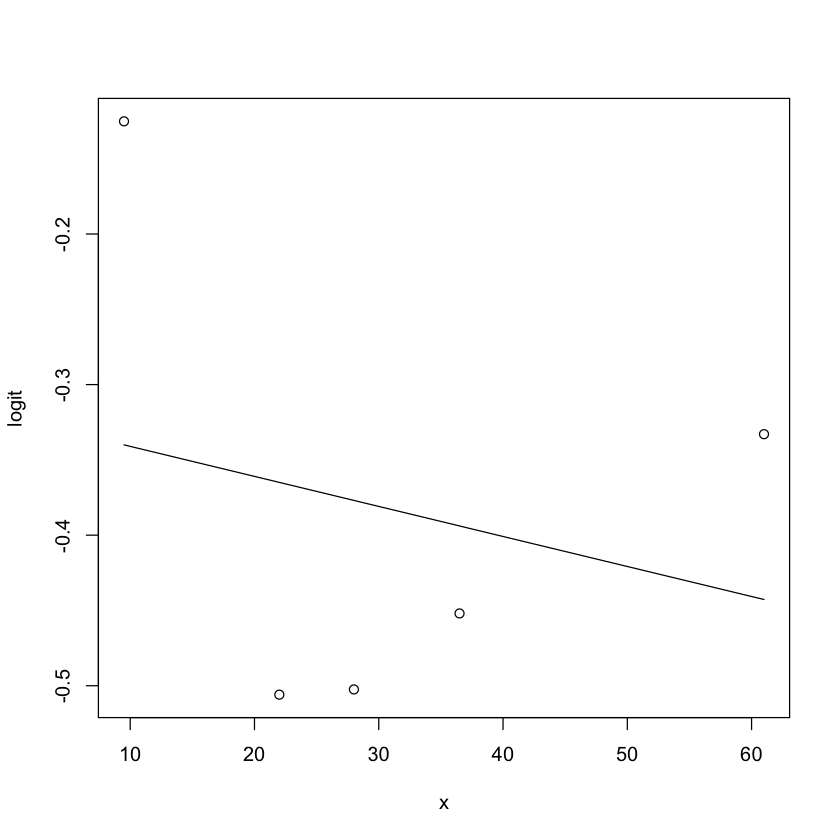

In [39]:
bornes <- c(quantile(df$age, probs = seq(0, 1, by = 0.2)))
df$age_discret <- cut(df$age, breaks=bornes)
pix = table(df$age_discret, df$survived)/rowSums(table(df$age_discret, df$survived))
logit=log((pix[,2])/(1-pix[,2]))
x = (c(0,19,25,31,42)+c(19,25,31,42,80))/2
plot(x, logit)
lines(x, lm(logit~x)$fit)

In [40]:
surv.age.discret <- glm(survived ~ age_discret, family = binomial, data = df)
summary(surv.age.discret)


Call:
glm(formula = survived ~ age_discret, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1247  -0.9925  -0.9714   1.3217   1.3984  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -0.1252     0.1339  -0.935   0.3499  
age_discret(19,25]  -0.3808     0.1936  -1.967   0.0492 *
age_discret(25,31]  -0.3773     0.2005  -1.881   0.0599 .
age_discret(31,42]  -0.3268     0.1934  -1.690   0.0911 .
age_discret(42,80]  -0.2078     0.1978  -1.050   0.2935  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1409.2  on 1042  degrees of freedom
Residual deviance: 1403.8  on 1038  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 1413.8

Number of Fisher Scoring iterations: 4


In [41]:
1-pchisq(surv.age.discret$null.deviance-surv.age.discret$deviance,surv.age.discret$df.null-surv.age.discret$df.residual)

[1] 0.2429917